In [1]:
import os
from sys import argv, stdout, stderr
from ROOT import TFile, gROOT, TCanvas, TLegend, TH1F, TF1
import array
import sys                                                                                                                                                                                                                                                  
gROOT.SetStyle("Plain")                                                                                                                                                                                                                                           
gROOT.SetBatch(True)

Welcome to JupyROOT 6.12/07


In [2]:
def positivize(histogram):
    output = histogram.Clone()
    for i in range(output.GetSize()):
        if output.GetArray()[i] < 0:
            output.AddAt(0, i)
    return output

In [16]:
f = TFile("shapesMuEBDTQCD.root")
h = f.Get('2jet_gg/QCD')
print h.GetBinContent(7), h.GetBinError(7)
print h.GetBinContent(9), h.GetBinError(9)
print h.GetBinContent(10), h.GetBinError(10)
print h.GetBinContent(11), h.GetBinError(11)
print h.GetBinContent(12), h.GetBinError(12)
print h.GetBinContent(13), h.GetBinError(13)

6.92478206474e-05 5.25416662628e-06
3.19187602145e-05 4.1779900732e-06
2.47152529482e-05 4.04315055772e-06
0.020467326045 0.0204418016729
5.08422708663e-05 2.84006787033e-05
1.34503407025e-05 2.63277607441e-06


In [147]:
f = TFile("../../results/Data2017/AnalyzeMuESysBDT/TT.root")
h0 = f.Get('TightOS2Jet/bdtDiscriminator')
h1 = f.Get('TightOS2Jet/JERUp/bdtDiscriminator')
h2 = f.Get('TightOS2Jet/JERDown/bdtDiscriminator')
#print h0.GetBinContent(106)+h0.GetBinContent(107)+h0.GetBinContent(108)+h0.GetBinContent(109)+h0.GetBinContent(110)
#print h1.GetBinContent(106)+h1.GetBinContent(107)+h1.GetBinContent(108)+h1.GetBinContent(109)+h1.GetBinContent(110)
#print h2.GetBinContent(106)+h2.GetBinContent(107)+h2.GetBinContent(108)+h2.GetBinContent(109)+h2.GetBinContent(110)
print h0.Integral(), h1.Integral()-h0.Integral(), h2.Integral()-h0.Integral()

17015.3054891 -226.017453954 -645.643885367


In [149]:
f = TFile("shapesMuEBDTQCD.root")
binning = array.array('d', [-0.55, -0.45, -0.4, -0.35, -0.3, -0.25, -0.2, -0.15, -0.1, -0.05, 0.0, 0.05, 0.1, 0.15, 0.2, 0.35])
h0 = f.Get('2jet_gg/TT')
h1 = f.Get('2jet_gg/TT_CMS_Jer_2017_13TeVUp')
h2 = f.Get('2jet_gg/TT_CMS_Jer_2017_13TeVDown')
print h0.Integral(), h1.Integral()-h0.Integral(), h2.Integral()-h0.Integral()

17013.4995575 -225.17010498 -645.652999878


Warning in <TCanvas::Constructor>: Deleting canvas with same name: 


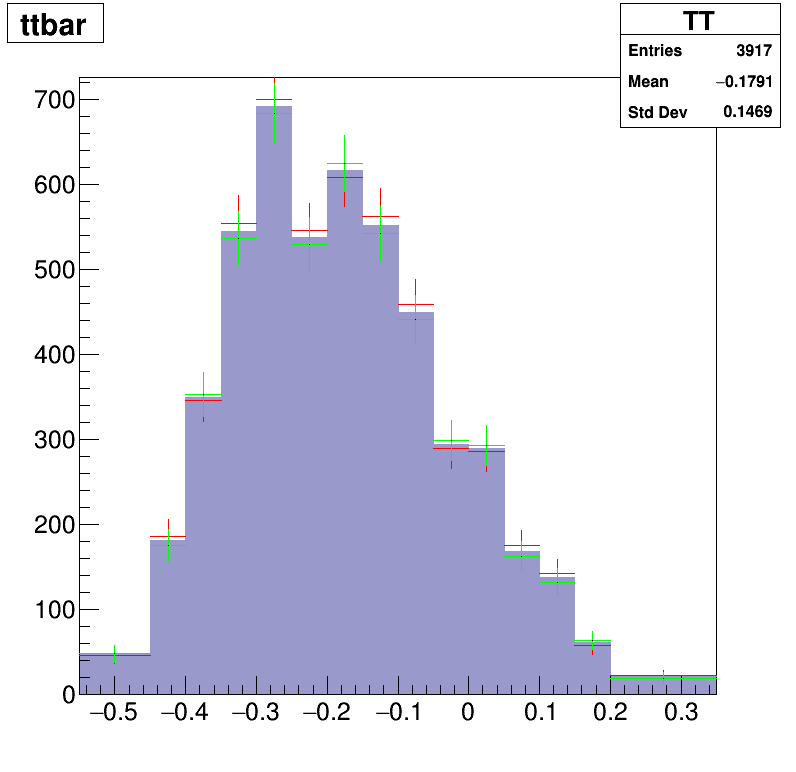

In [142]:
canvas = TCanvas("", "", 800, 800)
h1.SetLineColor(2)
h2.SetLineColor(3)
h0.Draw("Hist")
h1.Draw("SAME")
h2.Draw("SAME")
canvas.Draw()

0.0186581115407
 FCN=7.99597 FROM MIGRAD    STATUS=CONVERGED     144 CALLS         145 TOTAL
                     EDM=3.00863e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     9.99308e+00   3.16720e+00   4.22588e-03  -2.34379e-04
   2  Mean         4.99910e-03   6.13042e-03   8.99599e-06  -4.79851e-02
   3  Sigma        1.86581e-02   3.15866e-03   3.23643e-05  -2.26204e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: 
Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).


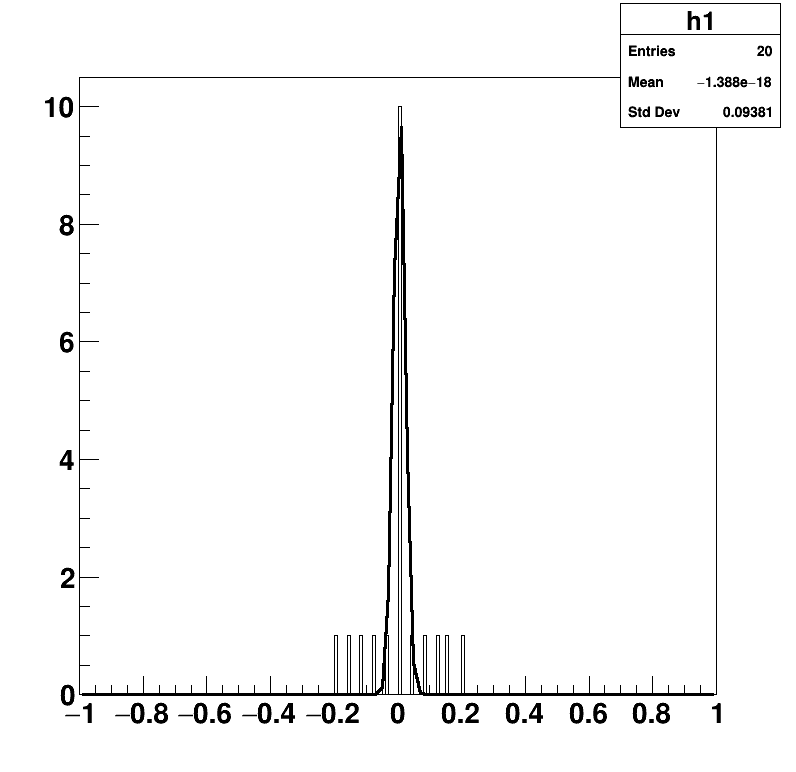

In [71]:
canvas = TCanvas("", "", 800, 800)
f = TF1("Gauss law","gaus", -1.0, 1.0)
f.SetParameters(1,0,1)
f.SetParLimits(2, 0.02, 0.20)
h = TH1F("h1", "", 200, -1.0, 1.0)
h.Fill(-0.04)
h.Fill(-0.08)
h.Fill(-0.12)
h.Fill(-0.16)
h.Fill(-0.20)
h.Fill(0.0);h.Fill(0.0);h.Fill(0.0);h.Fill(0.0);h.Fill(0.0);h.Fill(0.0);h.Fill(0.0);h.Fill(0.0);h.Fill(0.0);h.Fill(0.0);
h.Fill(0.04)
h.Fill(0.08)
h.Fill(0.12)
h.Fill(0.16)
h.Fill(0.20)
fitResult = h.Fit(f, "S")
h.Draw()
canvas.Draw()
print fitResult.Value(2)